### Imports and graphing function

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch

# Chart Function
def plot_results(file_paths, labels):
    """
    Plots various metrics from machine learning training runs.

    Parameters:
    - file_paths: List of strings representing the file paths to CSV files.
    - labels: List of strings representing the labels for each dataset.
    """

    # Read DataFrames
    dataframes = [pd.read_csv(fp) for fp in file_paths]
    num_datasets = len(dataframes)

    # Extract data
    epochs_list = [df['Epoch'] for df in dataframes]
    test_accuracy_list = [df['Test Accuracy'] for df in dataframes]
    test_error_list = [df['Test Error'] for df in dataframes]
    training_loss_list = [df['Training Loss'] for df in dataframes]
    test_loss_list = [df['Test Loss'] for df in dataframes]
    x_k_list = [df['x_k Comparison'] if 'x_k Comparison' in df.columns else pd.Series([0] * len(df)) for df in dataframes]
    x_ag_k_list = [df['x_ag_k Comparison'] if 'x_ag_k Comparison' in df.columns else pd.Series([0] * len(df)) for df in dataframes]

    # Square the gradient norms
    training_grad_norm_squared_list = [df['Training Gradient Norm']**2 for df in dataframes]
    test_grad_norm_squared_list = [df['Test Gradient Norm']**2 for df in dataframes]
    total_training_time_list = [df['Training Time (s)'].cumsum() for df in dataframes]

    # Check if Epochs are the same across datasets
    epoch_lengths = [len(e) for e in epochs_list]
    max_epochs = max(epoch_lengths)
    if len(set(epoch_lengths)) > 1:
        print(f"Warning: Epochs in dataset(s) differ from the longest dataset.")

    # Set up colors using a colormap
    cmap_name = 'tab10' if num_datasets <= 10 else 'tab20'
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i % cmap.N) for i in range(num_datasets)]

    # Create subplots with 7 rows and 2 columns
    fig, axes = plt.subplots(7, 2, figsize=(20, 38))

    # Row 1: Test Accuracy over Epochs and Training Time
    # Plot 1: Test Accuracy over Epochs (left plot)
    for i in range(num_datasets):
        axes[0, 0].plot(epochs_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 0].axhline(y=0.68, color='gray', linestyle='--', linewidth=1)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Test Accuracy')
    axes[0, 0].set_title(f'Test Accuracy over {max_epochs} Epochs')
    axes[0, 0].legend()

    # Plot 2: Test Accuracy vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[0, 1].plot(total_training_time_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 1].axhline(y=0.68, color='gray', linestyle='--', linewidth=1)
    axes[0, 1].set_xlabel('Training Time (s)')
    axes[0, 1].set_ylabel('Test Accuracy')
    axes[0, 1].set_title('Test Accuracy vs Total Training Time')
    axes[0, 1].legend()

    # Row 2: Training Loss over Epochs and Test Loss over Epochs
    # Plot 3: Training Loss over Epochs (left plot)
    for i in range(num_datasets):
        axes[1, 0].plot(epochs_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Training Loss')
    axes[1, 0].set_title(f'Training Loss over {max_epochs} Epochs')
    axes[1, 0].legend()

    # Plot 4: Test Loss over Epochs (right plot)
    for i in range(num_datasets):
        axes[1, 1].plot(epochs_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Test Loss')
    axes[1, 1].set_title(f'Test Loss over {max_epochs} Epochs')
    axes[1, 1].legend()

    # Row 3: Training Gradient Norm Squared over Epochs and Test Gradient Norm Squared over Epochs
    # Plot 5: Training Gradient Norm Squared over Epochs (left plot)
    for i in range(num_datasets):
        axes[2, 0].plot(epochs_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 0].set_xlabel('Epoch')
    axes[2, 0].set_ylabel('Gradient Norm Squared')
    axes[2, 0].set_title(f'Training Gradient Norm Squared over {max_epochs} Epochs')
    axes[2, 0].legend()

    # Plot 6: Test Gradient Norm Squared over Epochs (right plot)
    for i in range(num_datasets):
        axes[2, 1].plot(epochs_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 1].set_xlabel('Epoch')
    axes[2, 1].set_ylabel('Gradient Norm Squared')
    axes[2, 1].set_title(f'Test Gradient Norm Squared over {max_epochs} Epochs')
    axes[2, 1].legend()

    # Row 4: Training Loss vs Total Training Time and Test Loss vs Total Training Time
    # Plot 7: Training Loss vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[3, 0].plot(total_training_time_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 0].set_xlabel('Training Time (s)')
    axes[3, 0].set_ylabel('Training Loss')
    axes[3, 0].set_title('Training Loss vs Total Training Time')
    axes[3, 0].legend()

    # Plot 8: Test Loss vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[3, 1].plot(total_training_time_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 1].set_xlabel('Training Time (s)')
    axes[3, 1].set_ylabel('Test Loss')
    axes[3, 1].set_title('Test Loss vs Total Training Time')
    axes[3, 1].legend()

    # Row 5: Training Gradient Norm Squared vs Total Training Time and Test Gradient Norm Squared vs Total Training Time
    # Plot 9: Training Gradient Norm Squared vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[4, 0].plot(total_training_time_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 0].set_xlabel('Training Time (s)')
    axes[4, 0].set_ylabel('Gradient Norm Squared')
    axes[4, 0].set_title('Training Gradient Norm Squared vs Total Training Time')
    axes[4, 0].legend()

    # Plot 10: Test Gradient Norm Squared vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[4, 1].plot(total_training_time_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 1].set_xlabel('Training Time (s)')
    axes[4, 1].set_ylabel('Gradient Norm Squared')
    axes[4, 1].set_title('Test Gradient Norm Squared vs Total Training Time')
    axes[4, 1].legend()

    # Row 6: Test Error Rate over Epochs and Training Time
    # Plot 11: Test Error Rate vs Epoch (left plot)
    for i in range(num_datasets):
        axes[5, 0].plot(epochs_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 0].set_xlabel('Epoch')
    axes[5, 0].set_ylabel('Test Error')
    axes[5, 0].set_title(f'Test Error over {max_epochs} Epochs')
    axes[5, 0].legend()

    # Plot 12: Test Error Rate vs Training Time (right plot)
    for i in range(num_datasets):
        axes[5, 1].plot(total_training_time_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 1].set_xlabel('Training Time (s)')
    axes[5, 1].set_ylabel('Test Error')
    axes[5, 1].set_title('Test Error vs Total Training Time')
    axes[5, 1].legend()

    # Row 7: x_bar and x_k comparisons
    # Plot 11: x_bar vs x_k vs Epoch (left plot)
    for i in range(num_datasets):
        axes[6, 0].plot(epochs_list[i], x_k_list[i], label=labels[i], color=colors[i])
    axes[6, 0].set_xlabel('Epoch')
    axes[6, 0].set_ylabel('||x_bar - x_k||')
    axes[6, 0].set_title(f'||x_bar - x_k|| over {max_epochs} Epochs')
    axes[6, 0].legend()

    # Plot 12: x_bar vs x_ag_k vs Epoch (right plot)
    for i in range(num_datasets):
        axes[6, 1].plot(epochs_list[i], x_ag_k_list[i], label=labels[i], color=colors[i])
    axes[6, 1].set_xlabel('Epoch')
    axes[6, 1].set_ylabel('||x_bar - x_ag_k||')
    axes[6, 1].set_title(f'||x_bar - x_ag_k|| over {max_epochs} Epochs')
    axes[6, 1].legend()

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

### AR Analysis

In [ ]:
one = "generated/hinge/n_2000_m_1000/AR/no-lr/100/1000/2024-12-03-14:12:55/results.csv"
two = "generated/hinge/n_2000_m_1000/AR/no-lr/100/1000/2024-12-03-14:13:46/results.csv"

files = [one, two]
labels = ["one", "two"]

plot_results(files, labels)


In [ ]:
# diverging runs

e1500 = "generated/hinge/n_2000_m_1000/AR/no-lr/1493/2024-12-04-09:49:16/results.csv"
e6000 = "generated/hinge/n_2000_m_1000/AR/no-lr/5897/1000/2024-12-04-10:01:06/results.csv"

files = [e1500, e6000]
labels = ["AR w/ AG, 1500 iterations", "AR w/ AG, 6000 iterations"]

plot_results(files, labels)

In [ ]:
# converging runs

e110 = "generated/hinge/n_2000_m_1000/AR/no-lr/110/1000/2024-12-04-09:53:04/results.csv"
e110_2 = "generated/hinge/n_2000_m_1000/AR/no-lr/110/1000/2024-12-04-09:57:01/results.csv"
e136 = "generated/hinge/n_2000_m_1000/AR/no-lr/136/1000/2024-12-04-09:57:49/results.csv"

files = [e110, e110_2, e136]
labels = ["AR w/ AG, 110 iterations", "AR w/ AG, 110 iterations (2)", "AR w/ AG, 136 iterations"]

plot_results(files, labels)

In [ ]:
# Best AR vs. AG vs. SGD

ar = "generated/hinge/n_2000_m_1000/AR/no-lr/136/1000/2024-12-04-09:57:49/results.csv"
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-11-06-16:28:14/results.csv"
sgd = "generated/hinge/n_2000_m_1000/GD/lr-0.4/200/no_batching/no_wd/2024-11-06-16:23:06/results.csv"

files = [ar, ag, sgd]
labels = ["AR w/ AG, 136 iterations", "AG w/ 200 iterations", "SGD w/ 200 iterations"]

plot_results(files, labels)

#### AR vs AG Through 30 epochs

In [17]:
ar_df = pd.read_csv("generated/hinge/n_2000_m_1000/AR/no-lr/136/1000/2024-12-04-09:57:49/results.csv")
ag_df = pd.read_csv("generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-11-06-16:28:14/results.csv")

In [27]:
ar_df.head()

,Subproblem,Iteration,Epoch,Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
0,1,1,1,1.019294,0.422298,0.082850,1.003211,0.250641,0.5093,0.4907,1.142885,1.124351
1,1,2,2,0.994098,0.393303,0.013710,0.994143,0.237511,0.5278,0.4722,1.108680,1.103336
2,1,3,3,0.964283,0.364193,0.010204,0.982883,0.230585,0.5559,0.4441,1.070114,1.079440
3,1,4,4,0.931811,0.333729,0.010168,0.970091,0.227097,0.5800,0.4200,1.039333,1.056504
4,1,5,5,0.898696,0.300849,0.009606,0.956520,0.224642,0.6034,0.3966,1.028272,1.038446


In [28]:
ag_df.head()

,Epoch,Training Loss,Total Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
0,1,0.984066,1.004354,0.402547,0.048453,0.997442,0.240259,0.5233,0.4767,1.130374,1.111550
1,2,0.945805,0.977416,0.389094,0.011979,0.988030,0.232380,0.5474,0.4526,1.094942,1.089717
2,3,0.892166,0.942607,0.373036,0.010374,0.975378,0.227727,0.5738,0.4262,1.056473,1.065403
3,4,0.826146,0.900864,0.353593,0.013964,0.960118,0.224529,0.6006,0.3994,1.032765,1.043979
4,5,0.751317,0.853342,0.330632,0.010234,0.943076,0.221540,0.6204,0.3796,1.045547,1.032014


In [ ]:
# Best AR vs. AG through 30 epochs

ar = "generated/hinge/n_2000_m_1000/cutoff30/ar.csv"
ag = "generated/hinge/n_2000_m_1000/cutoff30/ag.csv"

files = [ar, ag]
labels = ["AR w/ AG", "AG"]

plot_results(files, labels)

#### Data Comparison

In [ ]:
merged_df = pd.merge(
    ar_df,
    ag_df,
    on="Epoch",
    suffixes=("_AR", "_AG"),
)
merged_df.head()

In [ ]:
cols = [
    "Epoch",
    "Test Accuracy_AR",
    "Test Accuracy_AG",
    "Training Gradient Norm_AR",
    "Training Gradient Norm_AG",
    "Training Loss_AR",
    "Training Loss_AG",
    "Test Gradient Norm_AR",
    "Test Gradient Norm_AG",
    "Test Loss_AR",
    "Test Loss_AG",
]

merged_clean = merged_df[cols]
merged_clean.head(50)

#### Comparison at sigma_1 = {L_approx / 10, L_approx / 15, L_approx / 5}

**For sigma_1 = L / 10.0: 30% convergence**
<br>

3/10 converged (iterations = 110, 100, 136)

<br>
<br>

**For sigma_1 = L / 15.0: 40% convergence**
<br>

Converged: 

158-3 (2.3e-7), 197-4 (9e-7), 162-3 (2.8e-7), 129-2 (1e-6)
<br>
<br>

Diverged: sub3, sub4, sub3, 1295-12 (norm=0.06), sub5, sub3

<br>
<br>

**For sigma_1 = L / 5.0: 50% convergence**
<br>
<br>

Converged:

84-2 (1.61e-7), 84-2 (1.49e-7), 110-3 (5e-7), 139-4 (2e-6), 84-2 (1.54e-7)
<br>
<br>

Diverged:

1092-15 (7.7), sub5, sub4, sub3, 2200-12 (0.1)


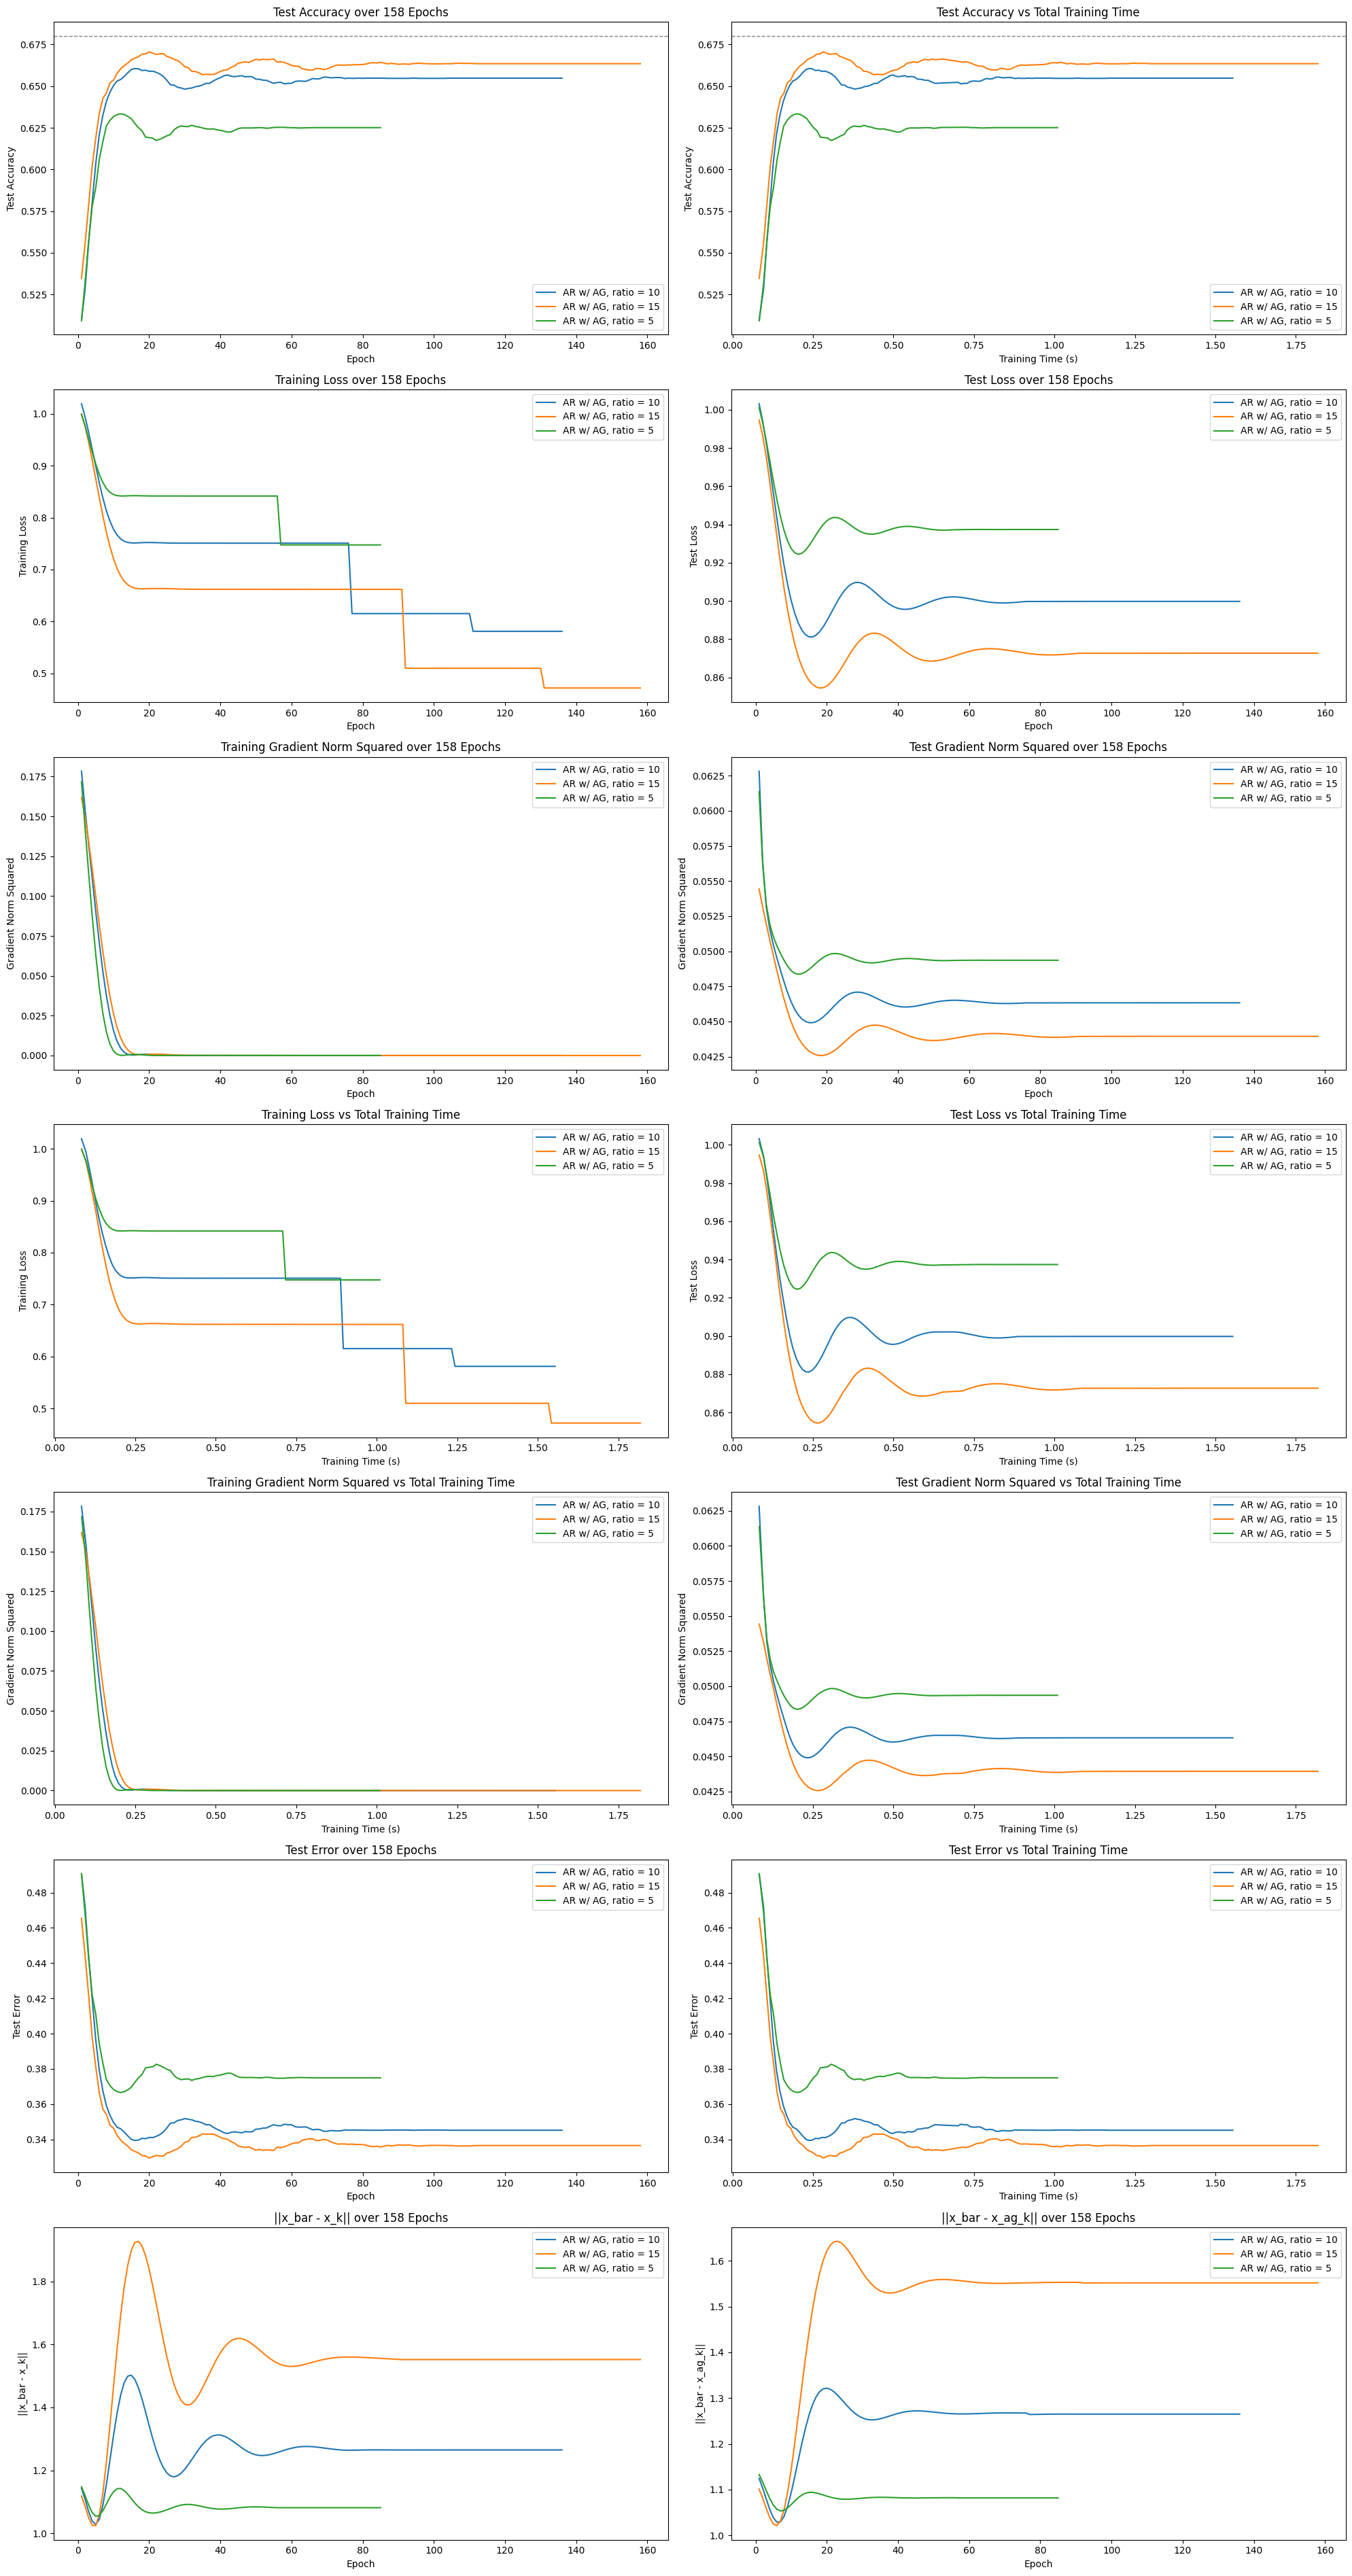

In [34]:
# comparing graphs

r10 = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_10.0/136/1000/2024-12-04-09:57:49/results.csv"
r15 = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_15.0/158/2024-12-04-11:05:18/results.csv"
r5 = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_5.0/85/2024-12-04-11:14:56/results.csv"

files = [r10, r15, r5]
labels = ["AR w/ AG, ratio = 10", "AR w/ AG, ratio = 15", "AR w/ AG, ratio = 5"]

plot_results(files, labels)